In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import the Data

In [3]:
data = pd.read_csv('full_data.csv', sep = ',')
data.head(10)

,Time,Infections
0,0,1
1,1,0
2,2,2
3,3,0
4,4,1
5,5,3
6,6,0
7,7,0
8,8,0
9,9,8


### Applying log transformation to the number of infections

In [5]:
# +1 used as a work around to log(0) infections
data['logInfections'] = np.log(data.Infections + 1)
data.head(10)

,Time,Infections,logInfections
0,0,1,0.693147
1,1,0,0.000000
2,2,2,1.098612
3,3,0,0.000000
4,4,1,0.693147
5,5,3,1.386294
6,6,0,0.000000
7,7,0,0.000000
8,8,0,0.000000
9,9,8,2.197225


### Statsmodels Linear Regression

In [6]:
X = data.Time
X = sm.add_constant(X)

C:\Users\Ian\Miniconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [7]:
y = data.logInfections

In [8]:
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          logInfections   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     25.91
Date:                Thu, 30 Apr 2020   Prob (F-statistic):           6.49e-06
Time:                        18:32:15   Log-Likelihood:                -57.797
No. Observations:                  48   AIC:                             119.6
Df Residuals:                      46   BIC:                             123.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7843      0.234      3.349      0.0

In [9]:
# log initial = 0.7843
# initial = 
np.exp(0.7843)

2.1908727928890923

In [10]:
# log 1 + r = 0.0437
# real 1 + r = 
np.exp(0.0437)

1.0446689072014812

In [11]:
# actual function = 
#y = np.exp(0.7843) * np.exp(0.0437) ** t

In [12]:
def linear_predictions(t):
    return np.exp(0.7843) * np.exp(0.0437) ** t

In [13]:
data['Predictions'] = data.Time.apply(linear_predictions)
data.head(10)

,Time,Infections,logInfections,Predictions
0,0,1,0.693147,2.190873
1,1,0,0.000000,2.288737
2,2,2,1.098612,2.390972
3,3,0,0.000000,2.497774
4,4,1,0.693147,2.609347
5,5,3,1.386294,2.725904
6,6,0,0.000000,2.847667
7,7,0,0.000000,2.974869
8,8,0,0.000000,3.107753
9,9,8,2.197225,3.246573


No handles with labels found to put in legend.


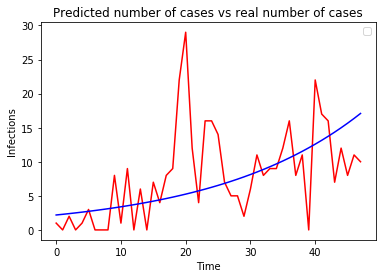

In [14]:
plt.plot(data.Time, data.Infections, 'red')
plt.plot(data.Time, data.Predictions, 'blue')
plt.title('Predicted number of cases vs real number of cases')
plt.xlabel('Time in Days')
plt.ylabel('Infections')
plt.legend()